In [1]:
from parseMD import Universe,Atom,compute_frame_from_atom,_prepared
from universe import *
import pandas as pd

In [2]:
#from dynpy_params import ParseDynamics as PD

In [3]:
atom = pd.read_csv("./example-data/tinker/methane/01/methane-oplsaa-atom-table.csv")

In [5]:
u,vel = _prepared(atom,timestep=0.01,start_prod=100,end_prod=2100,celldm=45.9)

In [6]:
from SRparse import *

In [7]:
#import dynpy_params as params
class ParseDynamics:
     MD_ENGINE = 'Tinker'
     traj_dir = './example-data/tinker/methane/'
     #traj_dir = './example-data/tinker/water/vapor/101kpa/' #Path to directory containing trajectory directories {01..XX} ('./example-data/' for example, or './trajectories/' for default space of your own traj data)
     #traj_dir = './example-data/tinker/water/' #Path to directory containing trajectory directories {01..XX} ('./example-data/' for example, or './trajectories/' for default space of your own traj data)
     #ntraj = 1 #number of trajectories to parse
     #nat = 384
     start_prod = 100 #MD step number to start sampling snapshots from. For the default setup and equilibration used in this package, 42000 (~6ps) is recommended
     #end_prod = 100
     #md_print_freq = 1
     #sample_freq = 1 #number of steps between sampled snapshots. Keep high for testing
     #celldm = 216.86/0.529177 #Simulation cell dimension in bohr. May be any expression returning floating point value
     #celldm = 16.22/0.529177 #Simulation cell dimension in bohr. May be any expression returning floating point value
     timestep = 0.001 #timestep of MD in picoseconds. May be any expression returning floating point value
     #parse_vel=False

class SpinRotation:
    mol_type = 'methane'
    nmol = 100
    C_SR = [16.495,16.495,-1.875]
    sample_freq = 10
    
class Snapshots:  #Input parameters file for neighbors.py. Used for parsing qe aiMD, making clusters, and writing inputs for ADF/QE-GIPAW
    write_ADF = True #If True, write input files for ADF EFG calcs
    write_GIPAW = False #If True, write input files for QE-PAW EFG calcs
    analyte_label = 'I' #Element symbol for analyte nucleus. Should be redundant with nuc_symbol and if not provided will be inferred from the latter
    nuc_symbol = '127I' #Analyte symbol prepended with the proper atomic mass number of the isotope
    solute_charge = -1 #Charge of the solute/analyte
    formal_charges = {'H':1,'O':-2}
    write_xyzs = True #If True, write set of xyz files of clusters used for ADF inputs
    nn = 30 #Number of nearest neighbor solvent molecules desired for clusters
    scratch = '/gpfs/scratch' #Scratch space to use for EFG calculations
    skip_compute_neighbors = False #If True, write new ADF inputs from existing xyz data from previous run. Use only if .xyz files exist and you know they are computed correctly

In [8]:
SR_module_main(u,vel,ParseDynamics,SpinRotation)

List of trajectories not provided. All will be parsed...
The following directories will be parsed as trajectories:
./example-data/tinker/methane/01



Continue? (Y/n) 


Explicit velocities not provided. Will be determined from position and timestep. If timestep is too large, these velocities will be inaccurate.
compute_atom_two                           --- 13.22 seconds ---
compute, classify, and label molecules     --- 36.21 seconds ---
group dataframes by molecule               --- 0.04 seconds ---
parallel compute angular vel,momentum      --- 151.04 seconds ---
parallel compute acfs                      --- 9.63 seconds ---
1/T1     =     0.0086 Hz
Total SR Run Time for ./example-data/tinker/methane/01    --- 210.30 seconds ---
Total SR Run Time         --- 210.30 seconds ---


In [13]:
#pos_grouped = pd.read_csv("./example-data/tinker/methane/pos_grouped.csv")
#vel_grouped = pd.read_csv("./example-data/tinker/methane/vel_grouped.csv")
#bonds_grouped = pd.read_csv("./example-data/tinker/methane/bonds_grouped.csv")
mol_ax = pd.read_csv("./example-data/tinker/methane/molax.csv")
ang_vel = pd.read_csv("./example-data/tinker/methane/ang_vel_molax.csv")
J_cart = pd.read_csv("./example-data/tinker/methane/J_cart.csv")
J_acfs = pd.read_csv("./example-data/tinker/methane/Jacfs_all.csv")

In [14]:
Jacf_mean = J_acfs.groupby('frame').apply(np.mean,axis=0)
Jacf_mean['time']=Jacf_mean['frame']*ParseDynamics.timestep

In [11]:
#J_acfs.groupby('molecule_label').plot(x='frame',y=['$J_{x}$','$J_{y}$','$J_{z}$'])

<Axes: xlabel='time'>

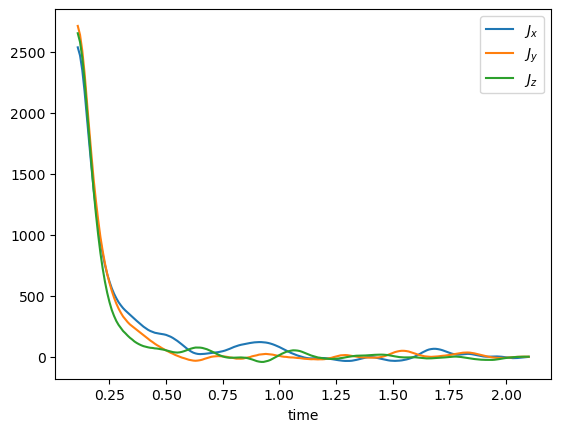

In [15]:
Jacf_mean.plot(x='time',y=['$J_{x}$','$J_{y}$','$J_{z}$'])

In [8]:
from parseMD import *

In [10]:
#import dynpy_params as params
class ParseDynamics:
     MD_ENGINE = 'Tinker'
     traj_dir = './example-data/tinker/methane/'
     #traj_dir = './example-data/tinker/water/vapor/101kpa/' #Path to directory containing trajectory directories {01..XX} ('./example-data/' for example, or './trajectories/' for default space of your own traj data)
     #traj_dir = './example-data/tinker/water/' #Path to directory containing trajectory directories {01..XX} ('./example-data/' for example, or './trajectories/' for default space of your own traj data)
     #ntraj = 1 #number of trajectories to parse
     #nat = 384
     start_prod = 100 #MD step number to start sampling snapshots from. For the default setup and equilibration used in this package, 42000 (~6ps) is recommended
     end_prod = 2100
     #md_print_freq = 1
     #sample_freq = 1 #number of steps between sampled snapshots. Keep high for testing
     celldm = 45.9/0.529177 #Simulation cell dimension in bohr. May be any expression returning floating point value
     timestep = 0.01 #timestep of MD in picoseconds. May be any expression returning floating point value
     #parse_vel=False

class SpinRotation:
    mol_type = 'methane'
    nmol = 100
    C_SR = [16.495,16.495,-1.875]
    sample_freq = 10

In [11]:
u,vel = PARSE_MD(PDtraj_dir,ParseDynamics)

NameError: name 'traj_dir' is not defined

In [ ]:
200*(12.01+4*1.01)*1.66054e-24

(5.3303334e-21/0.372)**(1/3)

2.428867430793715e-07/5.2918e-9

24.29/0.529177

In [16]:
J_acfs

,Unnamed: 0,$J_{x}$,$J_{y}$,$J_{z}$,frame,molecule_label,molecule
0,0,52.571444,29.638337,35.649802,2010,0,169
1,0,51.590316,28.837140,35.064601,2020,0,370
2,0,49.551196,27.517392,33.770802,2030,0,570
3,0,46.533468,25.716772,31.845895,2040,0,770
4,0,42.761753,23.416319,29.383890,2050,0,971
...,...,...,...,...,...,...,...
14995,0,-0.135994,-0.201888,0.041756,4960,49,59387
14996,0,-0.148365,-0.116815,0.040648,4970,49,59587
14997,0,-0.144266,-0.061301,0.034084,4980,49,59787
14998,0,-0.105929,-0.032671,0.022685,4990,49,59987


In [23]:
u,vel = prep_SR_uni1(u,vel,ParseDynamics,SpinRotation)

Explicit velocities not provided. Will be determined from position and timestep. If timestep is too large, these velocities will be inaccurate.


IndexError: index -1 is out of bounds for axis 0 with size 0

In [24]:
u.atom

,symbol,x,y,z,frame,label,molecule,mass,classification,molecule_label,mol-atom_index


In [13]:
u.compute_molecule()

In [14]:
u.molecule.classify(('H(4)C(1)','methane',True))
u.atom.loc[:,'classification'] = u.atom.molecule.map(u.molecule.classification)
u.atom = u.atom[u.atom['classification'] == SpinRotation.mol_type]

In [15]:
u.atom

,symbol,x,y,z,frame,label,molecule,mass,classification
2000000,C,16.106463,2.665951,13.437436,2000,0,3,12.010636,methane
2000001,H,16.904777,1.883718,11.711248,2000,1,3,1.007941,methane
2000002,H,14.897110,1.208667,14.363914,2000,2,3,1.007941,methane
2000003,H,15.090671,4.394341,12.970696,2000,3,3,1.007941,methane
2000004,H,17.727581,3.113384,14.637101,2000,4,3,1.007941,methane
...,...,...,...,...,...,...,...,...,...
2002995,C,17.454867,0.755080,5.874379,2002,995,605,12.010636,methane
2002996,H,18.534420,1.907823,7.209813,2002,996,605,1.007941,methane
2002997,H,18.087326,-1.198969,6.043176,2002,997,605,1.007941,methane
2002998,H,17.526695,1.379950,3.883451,2002,998,605,1.007941,methane


In [16]:
labels = pd.DataFrame(u.atom.groupby('molecule').apply(lambda x: tuple(x['label'])),columns=['mol_atom_labels'])
labels = labels[labels['mol_atom_labels']!=()]

In [17]:
molecule_labels = labels.groupby('mol_atom_labels').nunique().reset_index().reset_index().rename(columns={'index':'molecule_label'}).set_index('mol_atom_labels')

In [18]:
molecule_labels

,molecule_label
mol_atom_labels,
"(0, 1, 2, 3, 4)",0
"(5, 6, 7, 8, 9)",1
"(10, 11, 12, 13, 14)",2
"(15, 16, 17, 18, 19)",3
"(20, 21, 22, 23, 24)",4
...,...
"(975, 976, 977, 978, 979)",195
"(980, 981, 982, 983, 984)",196
"(985, 986, 987, 988, 989)",197


In [19]:
labels['molecule_label'] = labels.mol_atom_labels.map(molecule_labels.molecule_label)

In [21]:
labels.dtypes

mol_atom_labels    object
molecule_label      int64
dtype: object

In [24]:
u.atom['molecule_label'] = u.atom.molecule.map(labels.molecule_label).astype(int)

In [26]:
sets = u.atom.groupby('frame').apply(lambda x: set(list(x['molecule_label']))).values.tolist()

In [27]:
contiguos_molecules = set.intersection(*sets)

In [28]:
u.atom = u.atom[u.atom['molecule_label'].isin(contiguos_molecules)]

In [31]:
u.atom

,symbol,x,y,z,frame,label,molecule,mass,classification,molecule_label
2000000,C,16.106463,2.665951,13.437436,2000,0,3,12.010636,methane,0
2000001,H,16.904777,1.883718,11.711248,2000,1,3,1.007941,methane,0
2000002,H,14.897110,1.208667,14.363914,2000,2,3,1.007941,methane,0
2000003,H,15.090671,4.394341,12.970696,2000,3,3,1.007941,methane,0
2000004,H,17.727581,3.113384,14.637101,2000,4,3,1.007941,methane,0
...,...,...,...,...,...,...,...,...,...,...
2002995,C,17.454867,0.755080,5.874379,2002,995,605,12.010636,methane,199
2002996,H,18.534420,1.907823,7.209813,2002,996,605,1.007941,methane,199
2002997,H,18.087326,-1.198969,6.043176,2002,997,605,1.007941,methane,199
2002998,H,17.526695,1.379950,3.883451,2002,998,605,1.007941,methane,199


In [63]:
vel = pd.read_csv("./vel.csv")
#atom = pd.read_csv("./atom.csv")
vel

,Unnamed: 0,symbol,x,y,z,frame
0,0,O,0.343552D+01,0.164631D+01,-0.895100D+00,0
1,1,H,-0.694970D+01,0.207495D+02,-0.678917D-01,0
2,2,H,-0.531751D+02,0.185476D+02,0.242310D+02,0
3,3,O,0.285894D+01,0.646562D+01,0.326353D+01,0
4,4,H,0.198045D+02,0.911515D+01,0.229146D+01,0
...,...,...,...,...,...,...
6595,6595,H,0.169173D+02,0.716370D+01,0.290746D+02,10
6596,6596,H,-0.140890D+02,0.135674D+02,0.297809D+01,10
6597,6597,O,0.294320D+01,0.383972D+00,-0.397763D+01,10
6598,6598,H,-0.274846D+01,-0.822809D+01,0.125772D+02,10


In [17]:
from SRrax import correlate

In [19]:
J.groupby('molecule_label').apply(correlate,columns_in=['x','y','z'],columns_out=['$J_{x}$','$J_{y}$','$J_{z}$'],pass_columns=['frame','molecule_label','molecule'])

C:\Users\Adam\AppData\Local\Temp\ipykernel_8480\2107077702.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  J.groupby('molecule_label').apply(correlate,columns_in=['x','y','z'],columns_out=['$J_{x}$','$J_{y}$','$J_{z}$'],pass_columns=['frame','molecule_label','molecule'])


,$J_{x}$,$J_{y}$,$J_{z}$,frame,molecule_label,molecule
0,NaN,NaN,NaN,30000,1,0
1,NaN,NaN,NaN,30000,2,1
2,NaN,NaN,NaN,30010,1,61
3,NaN,NaN,NaN,30010,2,62
4,NaN,NaN,NaN,30020,1,123
...,...,...,...,...,...,...
397,NaN,NaN,NaN,31980,2,12038
398,NaN,NaN,NaN,31990,1,12097
399,NaN,NaN,NaN,31990,2,12098
400,NaN,NaN,NaN,32000,1,12157


In [57]:
vel

,atom,symbol,x,y,z,frame,label
0,600,O,-42.098948,111.295417,165.247620,1,0
1,601,H,-39.527389,104.223114,162.651325,1,1
2,602,H,-40.000198,104.374293,170.747944,1,2
3,603,O,-111.382685,-41.736073,-65.839010,1,3
4,604,H,-104.401174,-54.857704,-72.939102,1,4
...,...,...,...,...,...,...,...
5995,6595,H,-7.351907,75.578030,53.531096,10,595
5996,6596,H,-17.181113,71.479392,48.307069,10,596
5997,6597,O,-1.558505,-181.136709,83.911971,10,597
5998,6598,H,-0.541936,-187.608872,80.445976,10,598


In [58]:
atom

,atom,symbol,x,y,z,frame,label


In [46]:
vel['molecule'] = vel.index.map(atom['molecule'])

In [55]:
vel

,atom,x,y,z,frame,symbol,label,molecule
0,576000,-9.715625,0.915395,0.384324,30010,O,0,0.0
1,576001,-0.598988,-8.296343,9.754943,30010,H,1,0.0
2,576002,-2.933537,-3.503136,3.121120,30010,H,2,0.0
3,576003,-11.223066,-1.955803,-0.894785,30010,O,3,1.0
4,576004,9.731307,-4.580917,-15.700483,30010,H,4,1.0
...,...,...,...,...,...,...,...,...
38395,614395,0.940950,0.958078,-2.122938,32000,H,187,NaN
38396,614396,-29.337230,-3.261558,-7.062871,32000,H,188,NaN
38397,614397,70.524246,11.781382,3.033590,32000,O,189,NaN
38398,614398,6.479746,-18.157718,-38.550089,32000,H,190,NaN


In [28]:
acf = pd.read_csv("example-data/tinker/water/vapor/101kpa/01/Jacfs_all.csv")

In [29]:
mean_acf = acf.groupby("frame").apply(np.mean,axis=0)

<Axes: xlabel='frame'>

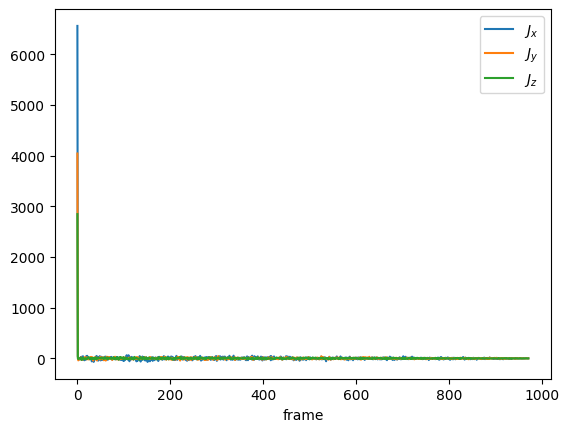

In [30]:
mean_acf.plot(x='frame',y=['$J_{x}$','$J_{y}$','$J_{z}$'])